In [103]:
%matplotlib inline
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

To find the baseline accuray of the model under logistic regression

In [104]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37306 entries, 0 to 38758
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIRM      37306 non-null  int64  
 1   class     37306 non-null  int64  
 2   Start     37306 non-null  int64  
 3   End       37306 non-null  int64  
 4   Length    37306 non-null  int64  
 5   Night     37306 non-null  int64  
 6   Gap       37306 non-null  int64  
 7   WS        37306 non-null  int64  
 8   idx       37306 non-null  int64  
 9   Base      37306 non-null  float64
 10  StartAdj  37306 non-null  float64
 11  LenAdj    37306 non-null  float64
 12  Comp      37306 non-null  float64
 13  Trans     37306 non-null  float64
 14  Press     37306 non-null  float64
 15  p1s       37306 non-null  int64  
 16  p1l       37306 non-null  int64  
 17  p2s       37306 non-null  int64  
 18  p2l       37306 non-null  int64  
 19  MalAdj    37306 non-null  int64  
 20  NFZ       37306 non-null  in

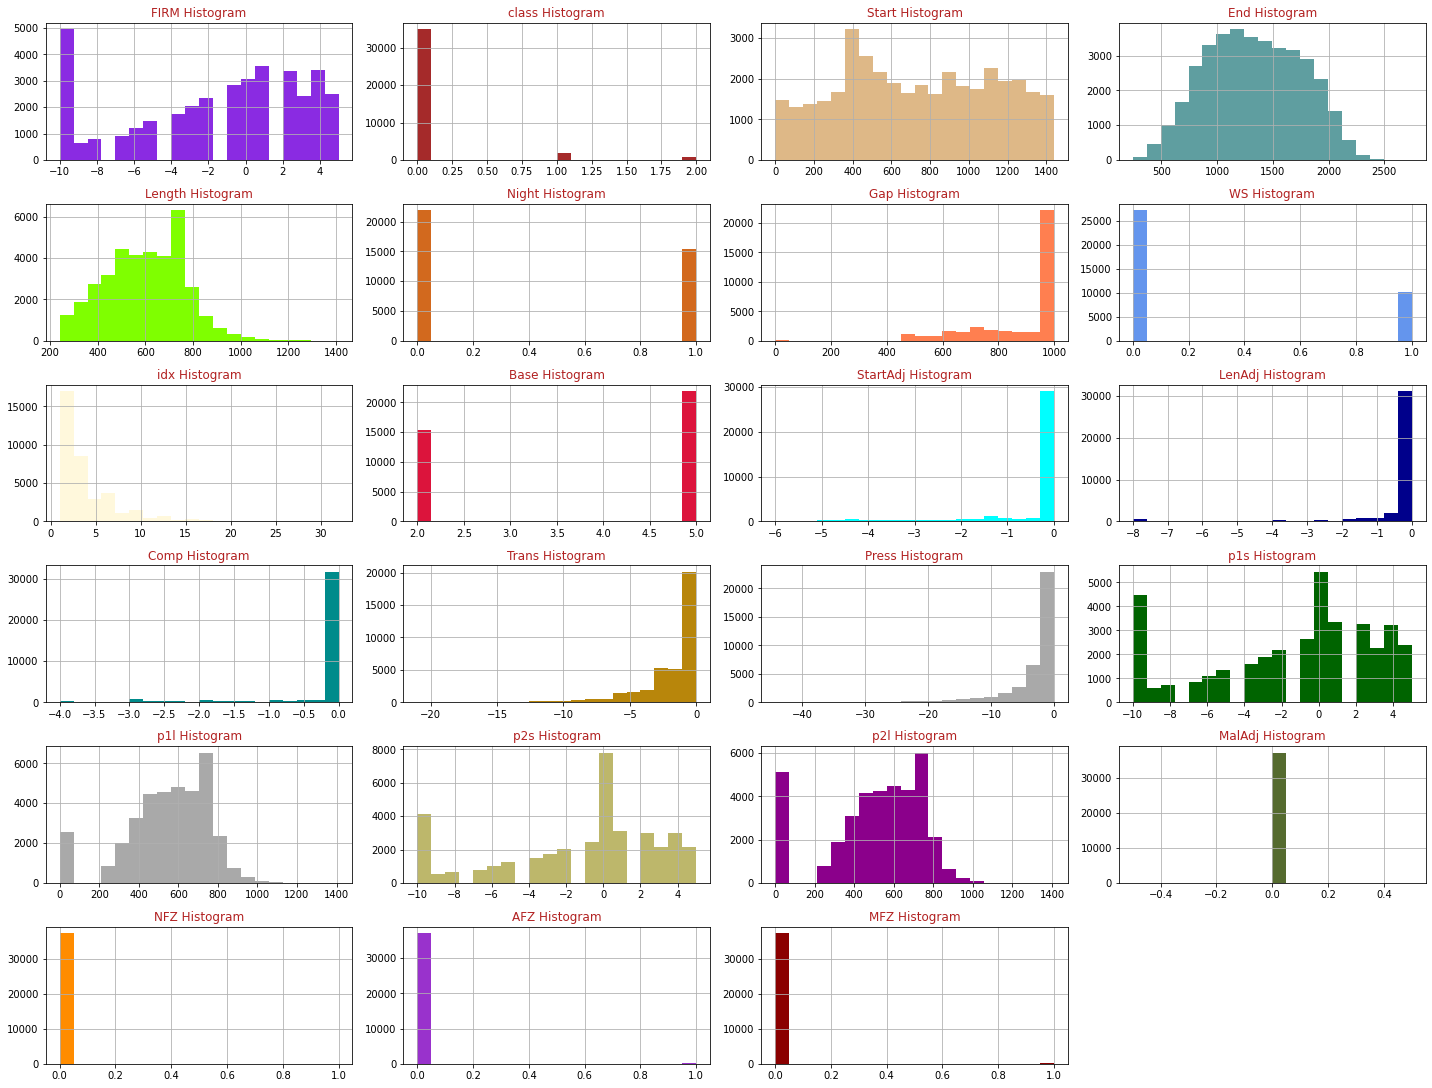

In [105]:
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    f = fig.add_subplot(8, 4, i + 1)
    df[feature].hist(bins = 20, ax = f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
fig.tight_layout()
plt.show()

In [106]:
def run_logistic_regression(df,seed):
    y = df.iloc[:,df.columns == 'class']
    X = df.iloc[:, df.columns != 'class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed, stratify=y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    model = LogisticRegression();
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')
    return model,X_test_scaled,y_test

#2)How accurately does the regressor classify the samples?

If you use the baseline Logistic Regresion you get a a accuracy of 94.36%


In [136]:
#Base one
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
model,X_test,y_test = run_logistic_regression(df,12)
# yhat = model.predict(X_test)
# print(sum(yhat))
# confusion_matrix(y_test,yhat)

The accuracy for the training set is 94.52%
The accuracy for the test set is 94.36%


If you force a one vs the rest by changing all the 2 to 1 you get a accuracy of 94.96%.

In [137]:
#Forced one vs rest
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df['class']=df['class'].replace(2,1)
model,X_test,y_test = run_logistic_regression(df,12)
# yhat = model.predict(X_test)
# print(sum(yhat))
# confusion_matrix(y_test,yhat)

The accuracy for the training set is 94.94%
The accuracy for the test set is 94.96%


From this we get that the accuracy is fairly high for this model failing getting mostly false positives. We also find that by forcing one vs rest onto the data set we can get a better result than using the multiclass.

#1)Are the two types of accident distinguishable?  Is there a fairly reliable way to tell these apart?

1)By looking at the 3 way confusion matrix we see that only type 1 accidents are found correctly meaning that the model cannot distinguise between type 1 or type 2 accidents. 

In [135]:
#Base one
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
model,X_test,y_test = run_logistic_regression(df,12)
yhat = model.predict(X_test)
confusion_matrix(y_test,yhat)

The accuracy for the training set is 94.52%
The accuracy for the test set is 94.36%


array([[6949,   24,    0],
       [ 263,   92,    1],
       [ 107,   26,    0]])

2)If we look at the one vs one logistic regresssion between class 1 and 2 in both different seed we find that the model also stuggles in distinguishing the two classes due to its low accuracy. By looking at the confusion matrix we find that the model gets a high amount of false positives(class 1 being predicted as class 2). 

In [109]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df=df[df['class'] >0]
model,X_test,y_test = run_logistic_regression(df,12)
yhat = model.predict(X_test)
print(sum(yhat))
confusion_matrix(y_test,yhat)

The accuracy for the training set is 73.15%
The accuracy for the test set is 73.01%
490


array([[356,   0],
       [132,   1]])

In [110]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df=df[df['class'] >0]
model,X_test,y_test = run_logistic_regression(df,40)
yhat = model.predict(X_test)
print(sum(yhat))
confusion_matrix(y_test,yhat)

The accuracy for the training set is 72.99%
The accuracy for the test set is 72.80%
491


array([[355,   1],
       [132,   1]])

3)By looking at the accuracy when we force one vs rest we find that the accuracy gets better than the normal multiclass logistic regression.

Therefore, we can conlude that the two type of accidents are not distinguisable through the three methods descibed above.


#3)Which of the features (input columns) are significant in performing the classification, and which can/should be ignored?

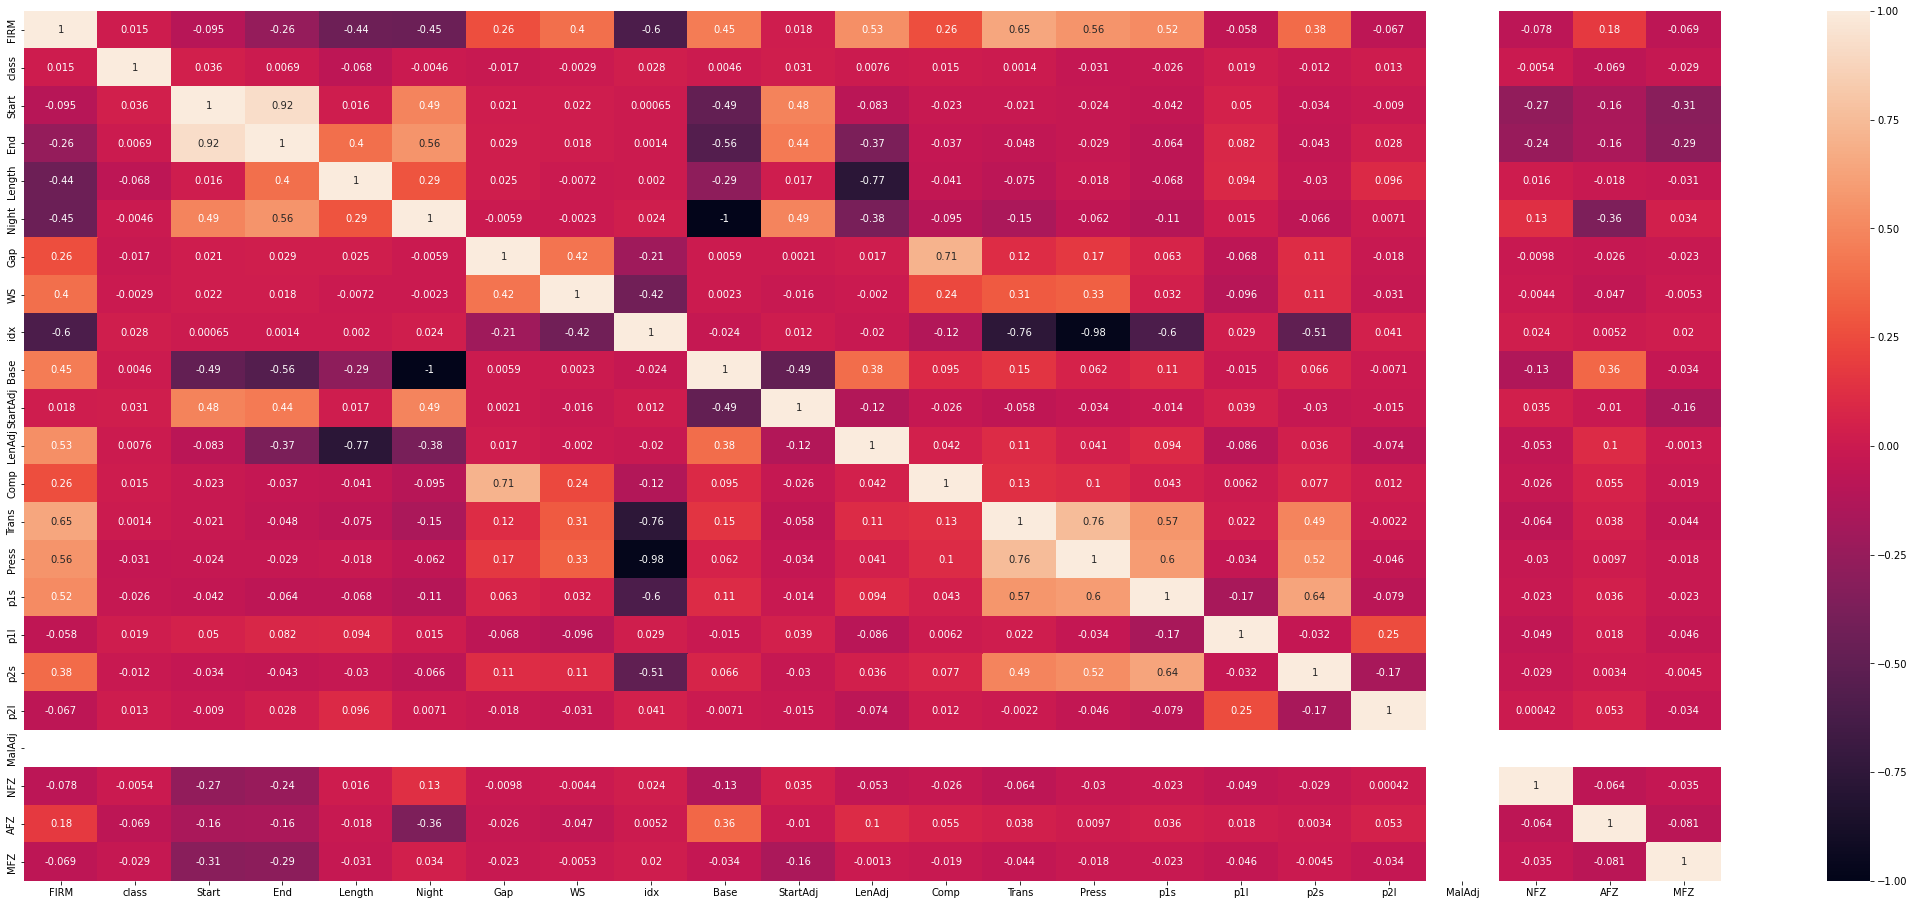

In [111]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

Dropping Features and calculating accuracy

In [121]:
def search_significant_features(df,seed):
    y = df.iloc[:,df.columns == 'class']
    X = df.iloc[:, df.columns != 'class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed, stratify=y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    model = LogisticRegression();
    model.fit(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)
    return 100*round(test_accuracy,4)

In [157]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
base_accuracy= search_significant_features(df,12)
significance={"worse":[[],[]],"better":[[],[]],"equal":[[],[]]}
for feature in df.columns:
    if feature == 'class':
        continue
    # print(feature)
    df_copy=df.copy()
    df_copy.drop(columns=[feature],inplace=True)
    test_accuracy = search_significant_features(df_copy,12)
    if base_accuracy==test_accuracy:
        significance["equal"][0].append(feature)
        significance["equal"][1].append(test_accuracy)
    elif base_accuracy<test_accuracy:
        significance["better"][0].append(feature)
        significance["better"][1].append(test_accuracy)
    else:
        significance["worse"][0].append(feature)
        significance["worse"][1].append(test_accuracy)

for key in significance:
    print(f"\n{key} than base accuracy of {base_accuracy}%")
    for value,accuracy in zip(significance[key][0],significance[key][1]):
        print(f"\tRemoving {value:9} produce a accuracy of {accuracy:.2f}%")


worse than base accuracy of 94.36%
	Removing FIRM      produce a accuracy of 94.34%
	Removing StartAdj  produce a accuracy of 94.34%
	Removing NFZ       produce a accuracy of 94.22%
	Removing AFZ       produce a accuracy of 93.73%
	Removing MFZ       produce a accuracy of 94.08%

better than base accuracy of 94.36%
	Removing WS        produce a accuracy of 94.37%
	Removing LenAdj    produce a accuracy of 94.47%
	Removing Trans     produce a accuracy of 94.40%
	Removing p1s       produce a accuracy of 94.38%
	Removing p2s       produce a accuracy of 94.37%
	Removing p2l       produce a accuracy of 94.38%

equal than base accuracy of 94.36%
	Removing Start     produce a accuracy of 94.36%
	Removing End       produce a accuracy of 94.36%
	Removing Length    produce a accuracy of 94.36%
	Removing Night     produce a accuracy of 94.36%
	Removing Gap       produce a accuracy of 94.36%
	Removing idx       produce a accuracy of 94.36%
	Removing Base      produce a accuracy of 94.36%
	Removing

Through grid search we can see which features affect the model's test prediction. Any feature under better or equal can be seen as not significant as their removal improved or didn't changed the accuracy of the model. The significant features are under worse as the removal of each cause the model to perfore mariginally or significanly worse than before.  

In [171]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
print(f"model with just features from worse\n")
df_copy = df[significance[key][0]].copy()
df_copy['class']=df['class']
df_copy.info()
model,X_test,y_test = run_logistic_regression(df_copy,12)

model with just features from worse

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37306 entries, 0 to 38758
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Start   37306 non-null  int64  
 1   End     37306 non-null  int64  
 2   Length  37306 non-null  int64  
 3   Night   37306 non-null  int64  
 4   Gap     37306 non-null  int64  
 5   idx     37306 non-null  int64  
 6   Base    37306 non-null  float64
 7   Comp    37306 non-null  float64
 8   Press   37306 non-null  float64
 9   p1l     37306 non-null  int64  
 10  MalAdj  37306 non-null  int64  
 11  class   37306 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.7 MB
The accuracy for the training set is 93.43%
The accuracy for the test set is 93.45%


By creating a model with just features from worse we created a model with better accuracy showing that these features are significant

In [176]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
print(f"model with just features from worse\n")
df_copy = df.drop(columns=significance['worse'][0]).copy()
df_copy.info()
model,X_test,y_test = run_logistic_regression(df_copy,12)

model with just features from worse

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37306 entries, 0 to 38758
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   37306 non-null  int64  
 1   Start   37306 non-null  int64  
 2   End     37306 non-null  int64  
 3   Length  37306 non-null  int64  
 4   Night   37306 non-null  int64  
 5   Gap     37306 non-null  int64  
 6   WS      37306 non-null  int64  
 7   idx     37306 non-null  int64  
 8   Base    37306 non-null  float64
 9   LenAdj  37306 non-null  float64
 10  Comp    37306 non-null  float64
 11  Trans   37306 non-null  float64
 12  Press   37306 non-null  float64
 13  p1s     37306 non-null  int64  
 14  p1l     37306 non-null  int64  
 15  p2s     37306 non-null  int64  
 16  p2l     37306 non-null  int64  
 17  MalAdj  37306 non-null  int64  
dtypes: float64(5), int64(13)
memory usage: 5.4 MB
The accuracy for the training set is 93.51%
The accuracy for th

By creating a model with with better and equal features we can see that they are not significant as they produced a model with similar accuracy as the base model.

Therefore, any feature under worse cannot be ignored and any feature from better or equal can be ignored.

#Extra Credit: running regression without firm


In [132]:
#Base one
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df.drop(columns=['FIRM'],inplace =True)
model,X_test,y_test = run_logistic_regression(df,12)
yhat = model.predict(X_test)
confusion_matrix(y_test,yhat)

The accuracy for the training set is 94.53%
The accuracy for the test set is 94.34%


array([[6949,   24,    0],
       [ 264,   91,    1],
       [ 107,   26,    0]])

In [133]:
#Forced one vs rest
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df.drop(columns=['FIRM'],inplace =True)
df['class']=df['class'].replace(2,1)
model,X_test,y_test = run_logistic_regression(df,12)
yhat = model.predict(X_test)
print(sum(yhat))
confusion_matrix(y_test,yhat)

The accuracy for the training set is 94.94%
The accuracy for the test set is 94.97%
178


array([[6941,   32],
       [ 343,  146]])

From this we get that FIRM feature does affect the accuracy if we use the base multiclass model. However when we force one vs rest the model accuracy is only ~0.1% better.   

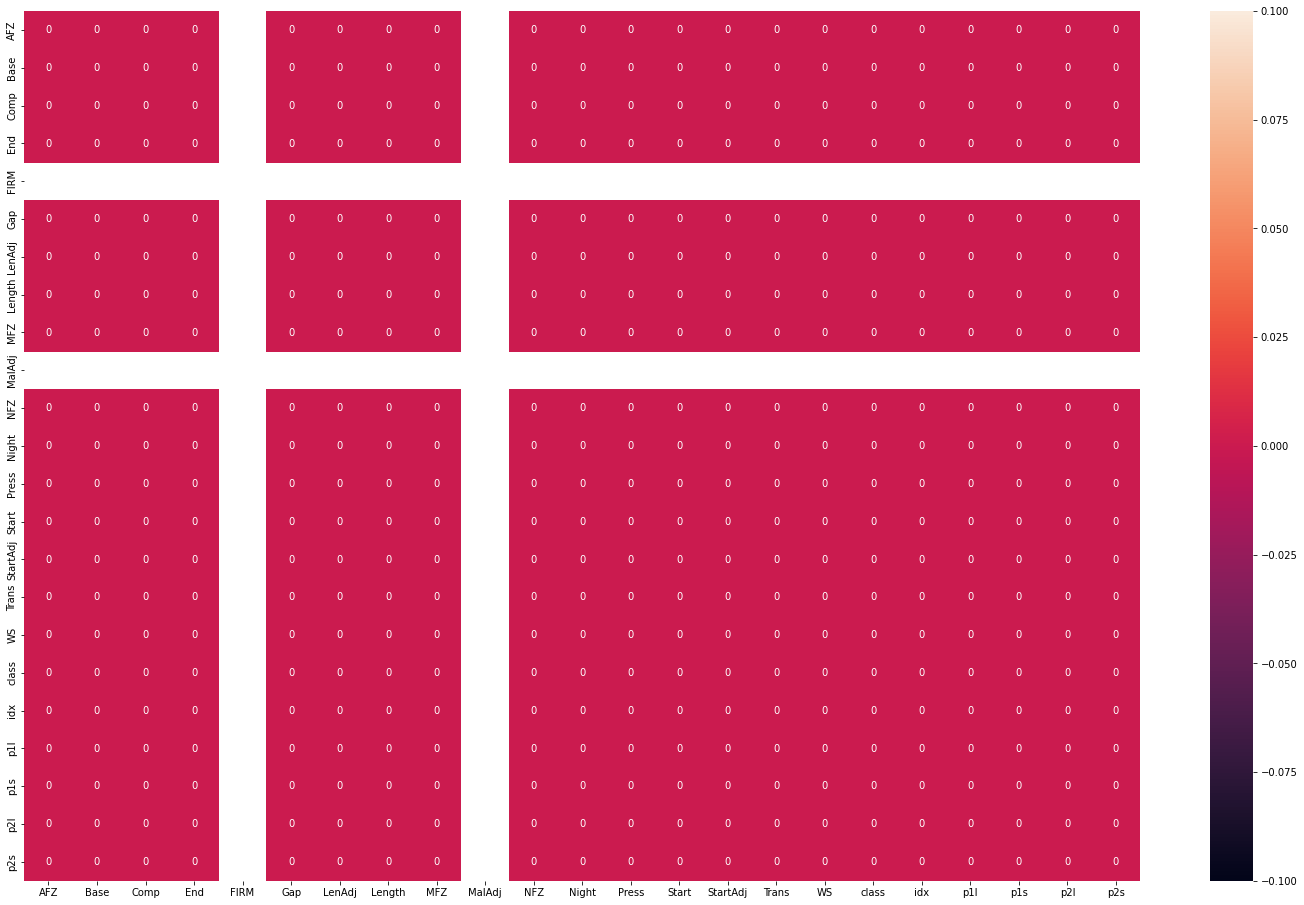

In [134]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
coor_map_with_firm= df.corr().copy()
df.drop(columns=['FIRM'],inplace =True)
coor_map_without_firm=df.corr()

plt.figure(figsize = (25, 16))
sns.heatmap(coor_map_without_firm.subtract(coor_map_with_firm), annot = True)
plt.show()

By subtracting the corralation matrix of one with firm and one without firm we see that the feature 'FIRM' has no significane on any other feature. This is seen as we have a table full with 0.

#Extra Code 

One Vs One for 0 vs 1 and 0 vs 2

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df=df[df['class'] <2]
model,X_test,y_test = run_logistic_regression(df,12)
yhat = model.predict(X_test)
print(sum(yhat))
confusion_matrix(y_test,yhat)

In [ ]:
df = pd.read_csv('FRAFirm.csv')
df.drop_duplicates(inplace=True)
df=df[df['class'] !=1]
model,X_test,y_test= run_logistic_regression(df,12)
yhat = model.predict(X_test)
print(sum(yhat))
confusion_matrix(y_test,yhat)